In [67]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
import acoustic_data_science.config as config
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
df = pd.read_feather(path=config.processed_data_path + '/2018_08.feather')
df = df[df['loud']]
df.head()

,index,25,32,40,50,63,79,100,126,158,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background,loud,short_transient
23778,23778,66.863640,70.259956,68.365021,68.890602,61.871201,67.794281,63.187988,60.906067,60.242050,...,80.909615,76.675468,76.744865,72.688705,ICLISTENHF1266_20180802T031304.000Z_TOL_1sHann...,2018-08-02 03:16:33.000,-49.712630,-63.018850,True,True
24090,24090,64.253380,89.372025,85.597137,72.882141,67.395378,68.206055,64.113258,64.929901,60.039650,...,58.929390,59.488087,60.486340,57.718498,ICLISTENHF1266_20180802T031804.000Z_TOL_1sHann...,2018-08-02 03:19:09.500,-52.608642,-63.132183,True,True
25216,25216,58.710720,62.790684,66.277863,65.653748,59.980873,59.472771,59.706337,64.054565,67.307297,...,82.154961,79.603065,79.779694,78.211487,ICLISTENHF1266_20180802T032804.000Z_TOL_1sHann...,2018-08-02 03:28:33.500,-44.569833,-63.775796,True,True
27231,27231,64.684822,67.376648,64.878799,61.265408,66.816467,67.186241,62.567608,63.545204,61.919773,...,86.346924,81.888298,84.245155,82.849876,ICLISTENHF1266_20180802T034305.000Z_TOL_1sHann...,2018-08-02 03:45:23.500,-52.138252,-64.648478,True,True
27452,27452,68.975677,70.004433,67.419479,66.922958,60.980789,67.380836,83.813965,84.775375,84.044113,...,60.250381,60.681328,60.950703,57.919811,ICLISTENHF1266_20180802T034305.000Z_TOL_1sHann...,2018-08-02 03:47:14.000,-52.950558,-64.673202,True,True


In [94]:
def get_transient_durations(df):
    # Mask df to only get loud rows.
    df['index_group'] = (df.index - np.arange(df.shape[0]))
    index_groups = df['index_group'].unique()
    
    transient_durations = []
    for index_group in index_groups:
        transient_times = df[df['index_group']==index_group]['timestamp'].values
        transient_durations.append((transient_times[-1] - transient_times[0]).astype('float')/1e9 + 0.5)
    
    # Cull any detected transient with length longer than 5 mins. Arbitrary for now.
    #transient_durations[i] = transient_durations[transient_durations < 5*60]
    transient_durations = np.array(transient_durations)
    return transient_durations

In [93]:
data_path = config.processed_data_path

months = config.get_months(data_path)
monthly_transient_durations = []

for feather_path in config.get_feather_paths(data_path):
    print(feather_path)
    
    df = pd.read_feather(feather_path)
    df = df[df['loud']]
    monthly_transient_durations.append(get_transient_durations(df))

monthly_transient_durations

/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_08.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_09.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_10.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_11.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_12.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_01.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_02.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_03.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_04.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/proces

[array([ 0.5,  0.5,  0.5, ..., 24. ,  2. ,  0.5]),
 array([188. ,   0.5,   1.5, ...,   1. ,   0.5,   0.5]),
 array([ 1. ,  0.5,  0.5, ..., 28. , 28. , 20.5]),
 array([37.5, 37.5,  0.5, ...,  0.5,  0.5, 13.5]),
 array([29.5,  0.5,  0.5, ...,  0.5,  6.5, 36.5]),
 array([24. , 63. ,  1.5, ...,  0.5,  0.5,  1. ]),
 array([ 1. ,  0.5,  0.5, ..., 16.5,  1.5,  0.5]),
 array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 5. ]),
 array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]),
 array([ 0.5,  0.5,  0.5, ...,  0.5,  2. , 31. ])]

In [95]:
def report_transient_stats(transient_durations):
    print('min (s)', transient_durations.min())
    print('max (mins)', transient_durations.max()/ 60) 
    print('sd ', transient_durations.std())
    
    print('durations > 0.5 ' , len(transient_durations[transient_durations>0.5]))
    print('durations = 0.5 ', len(transient_durations[transient_durations==0.5]))

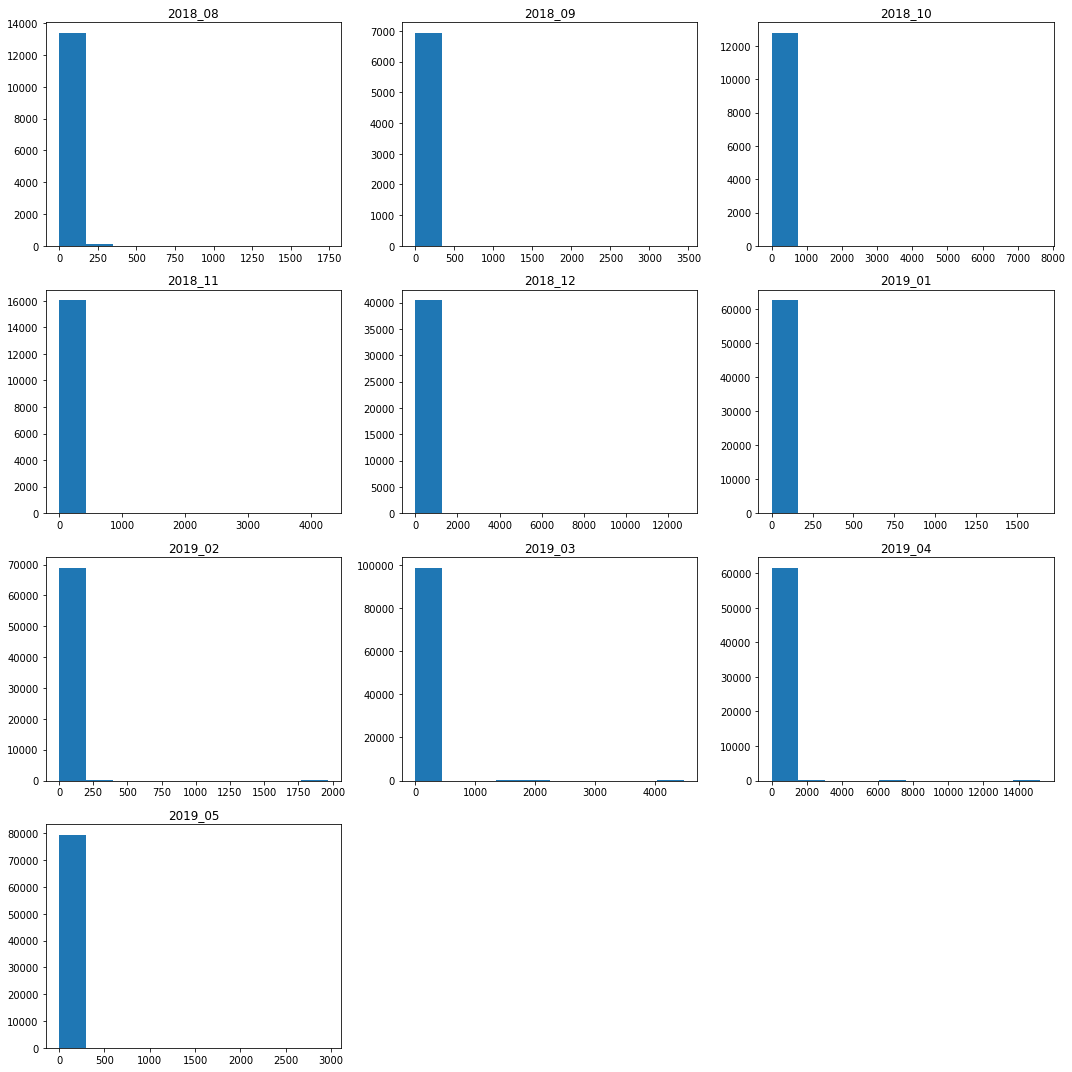

In [96]:
fig = plt.figure(figsize=(15,15))

i = 0
for transient_durations, month in zip(monthly_transient_durations, months):
    i+=1
    ax = fig.add_subplot(4,3,i)
    ax.set_title(month)
    ax.hist(transient_durations[transient_durations < 5], bins=10)

plt.tight_layout()
plt.show()

In [ ]:
for transient_durations, month in zip(monthly_transient_durations, months):
    print(month)
    report_transient_stats(transient_durations)
    print()

2018_08
min (s) 2592357.5
max (mins) 43205.958333333336
sd  0.0
durations > 0.5  1
durations = 0.5  0

2018_09
min (s) 2592420.5
max (mins) 43207.00833333333
sd  0.0
durations > 0.5  1
durations = 0.5  0

2018_10
min (s) 2678549.974
max (mins) 44642.499566666665
sd  0.0
durations > 0.5  1
durations = 0.5  0

2018_11
min (s) 1715572.533
max (mins) 28592.87555
sd  0.0
durations > 0.5  1
durations = 0.5  0

2018_12
min (s) 2677795.5
max (mins) 44629.925
sd  0.0
durations > 0.5  1
durations = 0.5  0

2019_01
min (s) 2678602.459
max (mins) 44643.37431666666
sd  0.0
durations > 0.5  1
durations = 0.5  0

2019_02
min (s) 2419320.5
max (mins) 40322.00833333333
sd  0.0
durations > 0.5  1
durations = 0.5  0

2019_03
min (s) 2678564.507
max (mins) 44642.74178333334
sd  0.0
durations > 0.5  1
durations = 0.5  0

2019_04
min (s) 2547862.43
max (mins) 42464.37383333334
sd  0.0
durations > 0.5  1
durations = 0.5  0

2019_05
min (s) 2674867.026
max (mins) 44581.1171
sd  0.0
durations > 0.5  1
duration

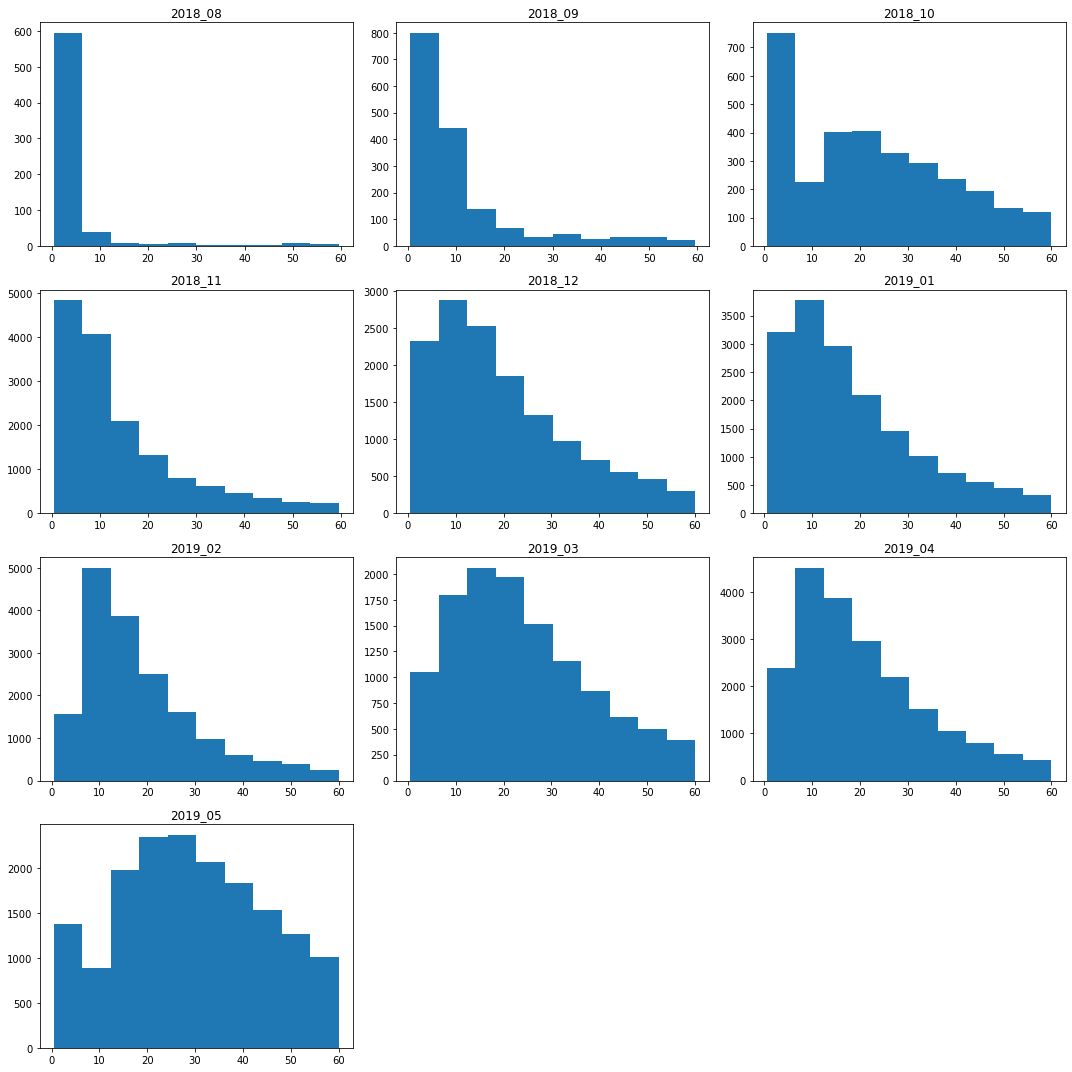

In [ ]:
fig = plt.figure(figsize=(15,15))

i = 0
for transient_durations, month in zip(monthly_transient_durations, months):
    i+=1
    ax = fig.add_subplot(4,3,i)
    ax.set_title(month)
    ax.hist(transient_durations[transient_durations<60], bins=10)

plt.tight_layout()
plt.show()